До обработки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Пропуски:
 survived         0
pclass           0
sex       

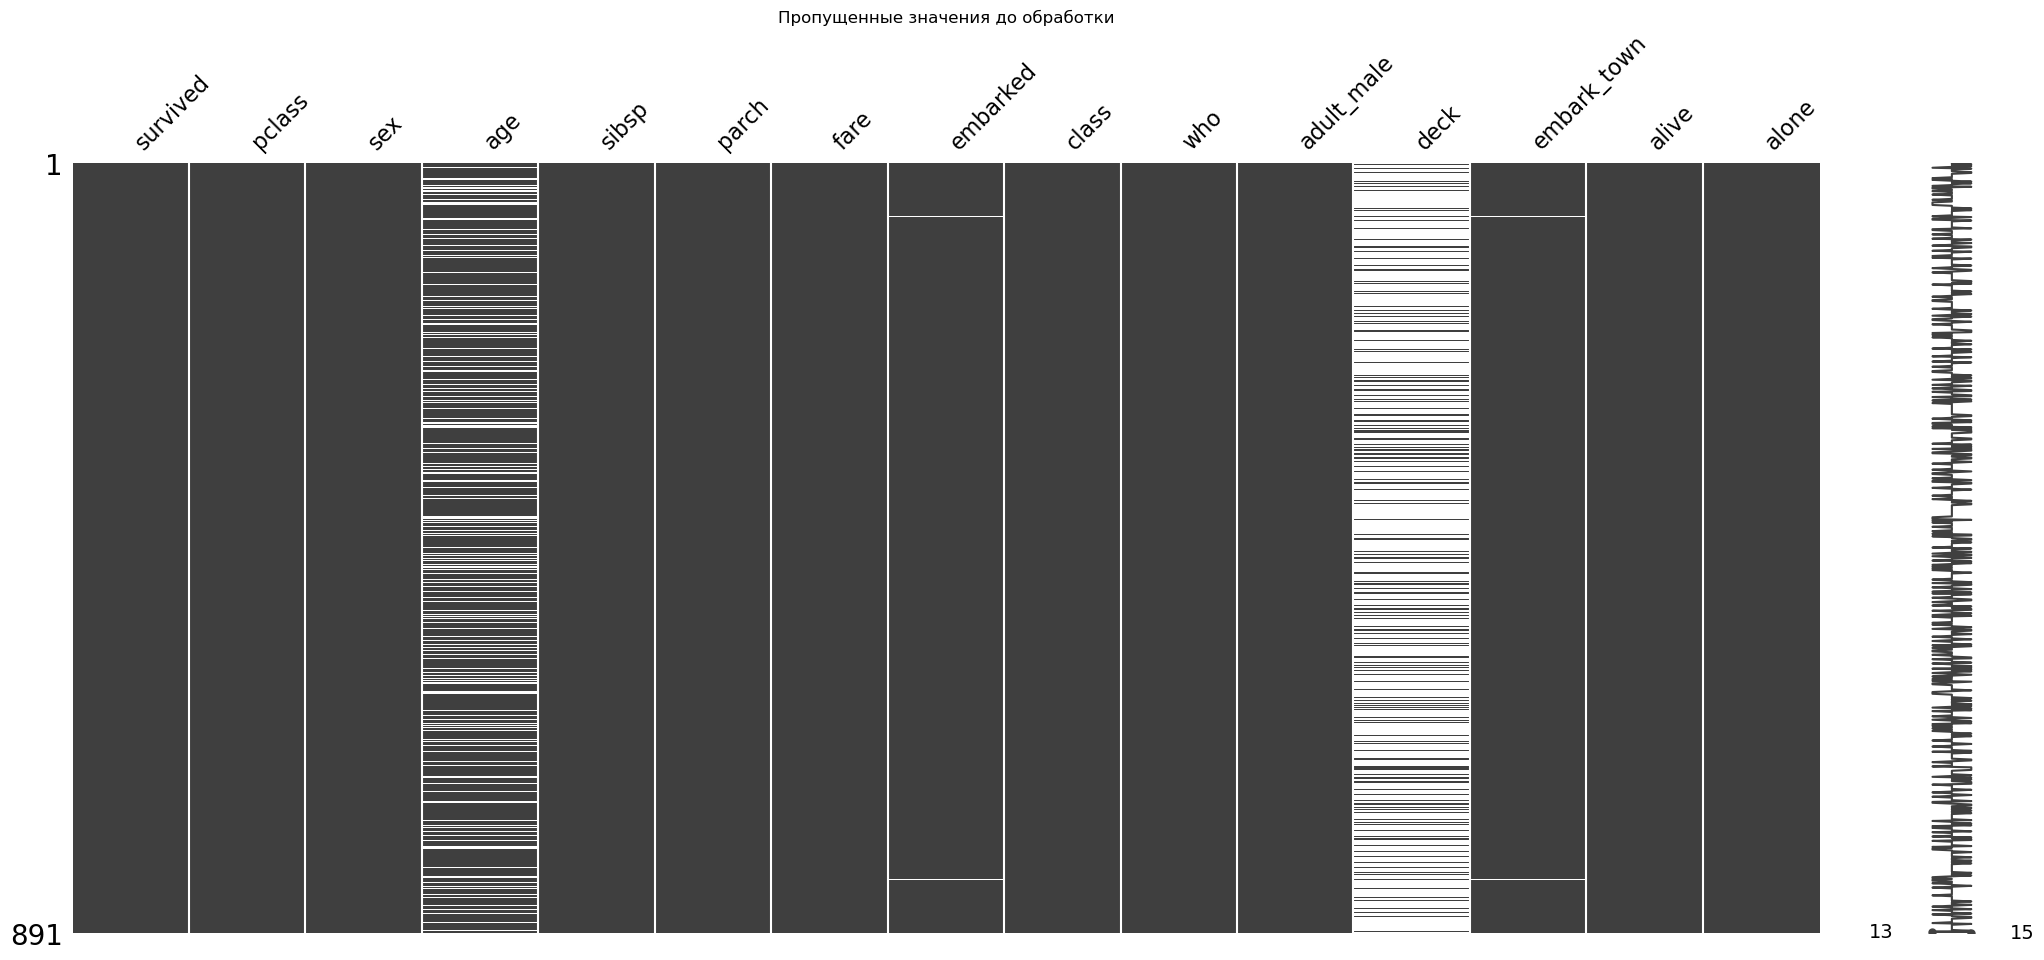


После обработки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB
None

Пропуски:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
pa

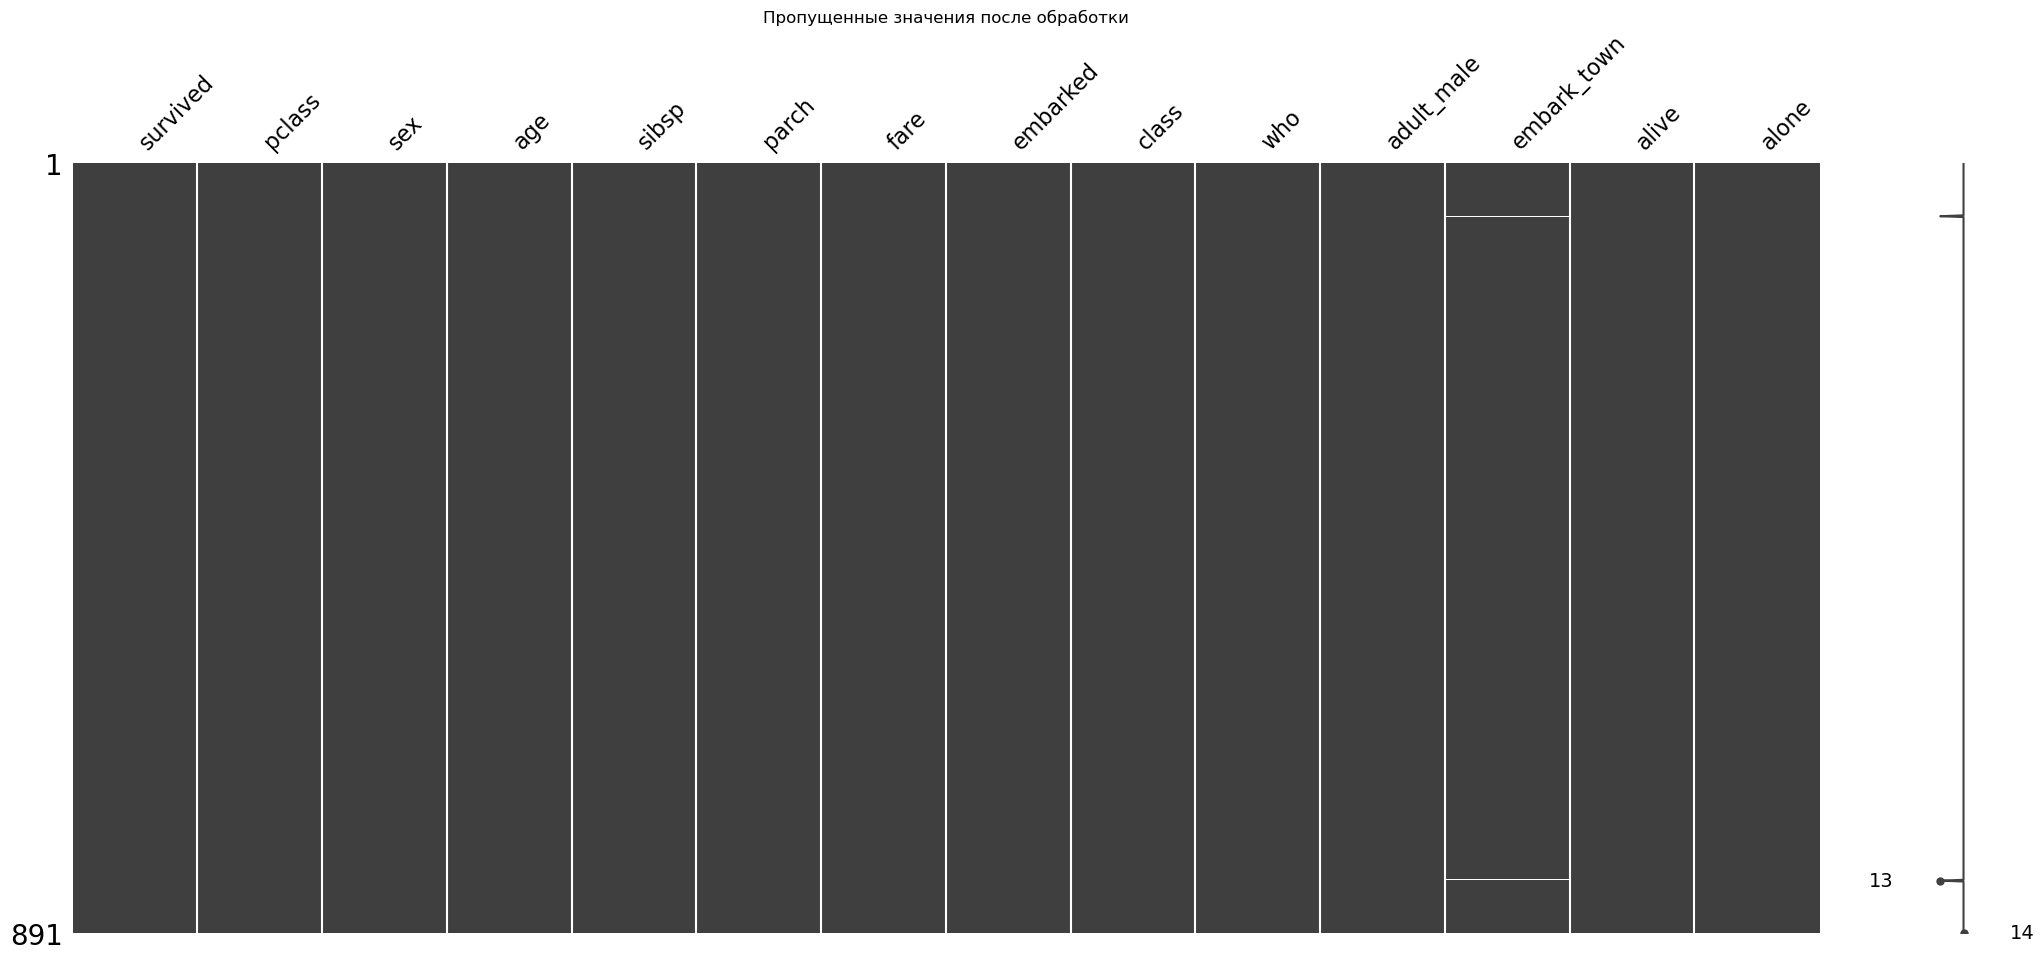

In [7]:
import seaborn as sns
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt


titanic = sns.load_dataset("titanic")


print("="*50 + "\nДо обработки:\n" + "="*50)
print(titanic.info())
print("\nПропуски:\n", titanic.isna().sum())


msno.matrix(titanic)
plt.title("Пропущенные значения до обработки")
plt.show()


titanic['age'] = titanic['age'].fillna(titanic['age'].mean())


most_frequent_embarked = titanic['embarked'].mode()[0]
titanic['embarked'] = titanic['embarked'].fillna(most_frequent_embarked)


titanic = titanic.drop(columns='deck')


print("\n" + "="*50 + "\nПосле обработки:\n" + "="*50)
print(titanic.info())
print("\nПропуски:\n", titanic.isna().sum())


msno.matrix(titanic)
plt.title("Пропущенные значения после обработки")
plt.show()

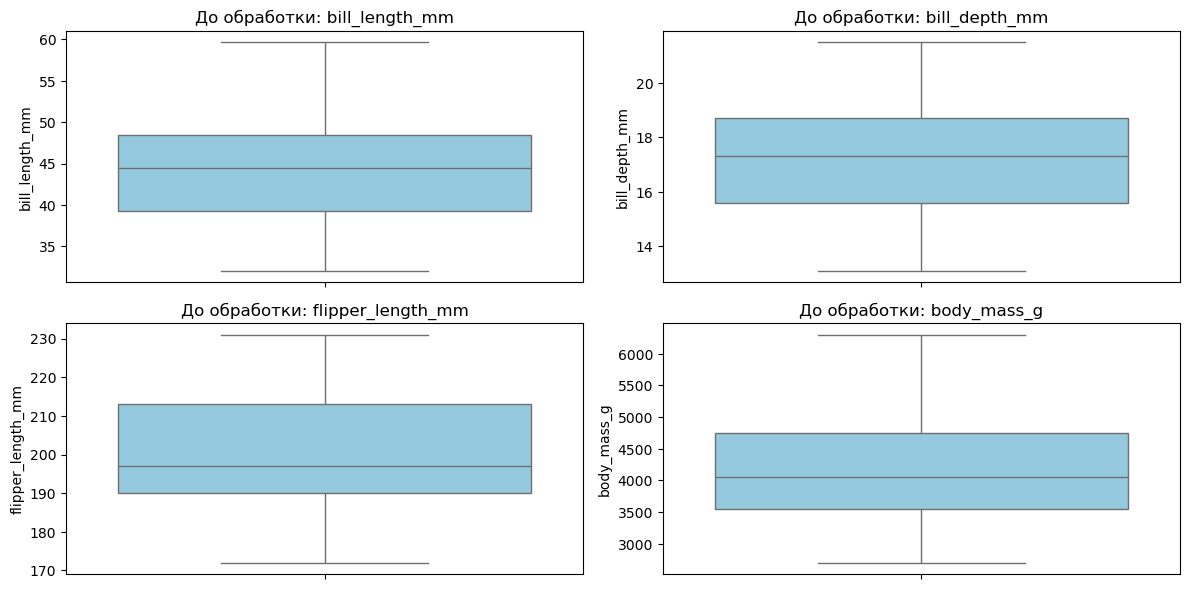


Размеры датасета:
Исходный размер: 344 строк
После очистки: 342 строк
Удалено строк: 2


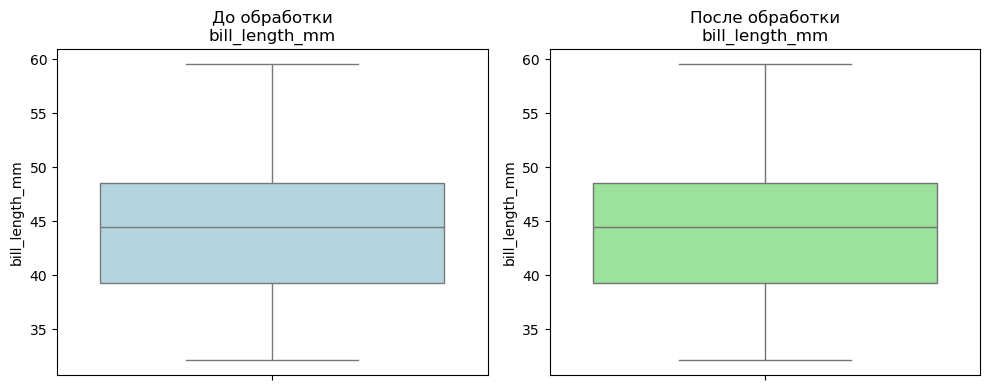

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


penguins = sns.load_dataset('penguins')


features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

plt.figure(figsize=(12, 6))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=penguins[feature], color='skyblue')
    plt.title(f'До обработки: {feature}')
plt.tight_layout()
plt.show()


def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

original_size = penguins.shape[0]

for feature in features:
    penguins = remove_outliers(penguins, feature)

new_size = penguins.shape[0]

# 4. Сравнение размеров
print(f"\n{'='*30}\nРазмеры датасета:\n{'='*30}")
print(f"Исходный размер: {original_size} строк")
print(f"После очистки: {new_size} строк")
print(f"Удалено строк: {original_size - new_size}")


plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
sns.boxplot(y=sns.load_dataset('penguins')['bill_length_mm'], color='lightblue')
plt.title('До обработки\nbill_length_mm')


plt.subplot(1, 2, 2)
sns.boxplot(y=penguins['bill_length_mm'], color='lightgreen')
plt.title('После обработки\nbill_length_mm')

plt.tight_layout()
plt.show()

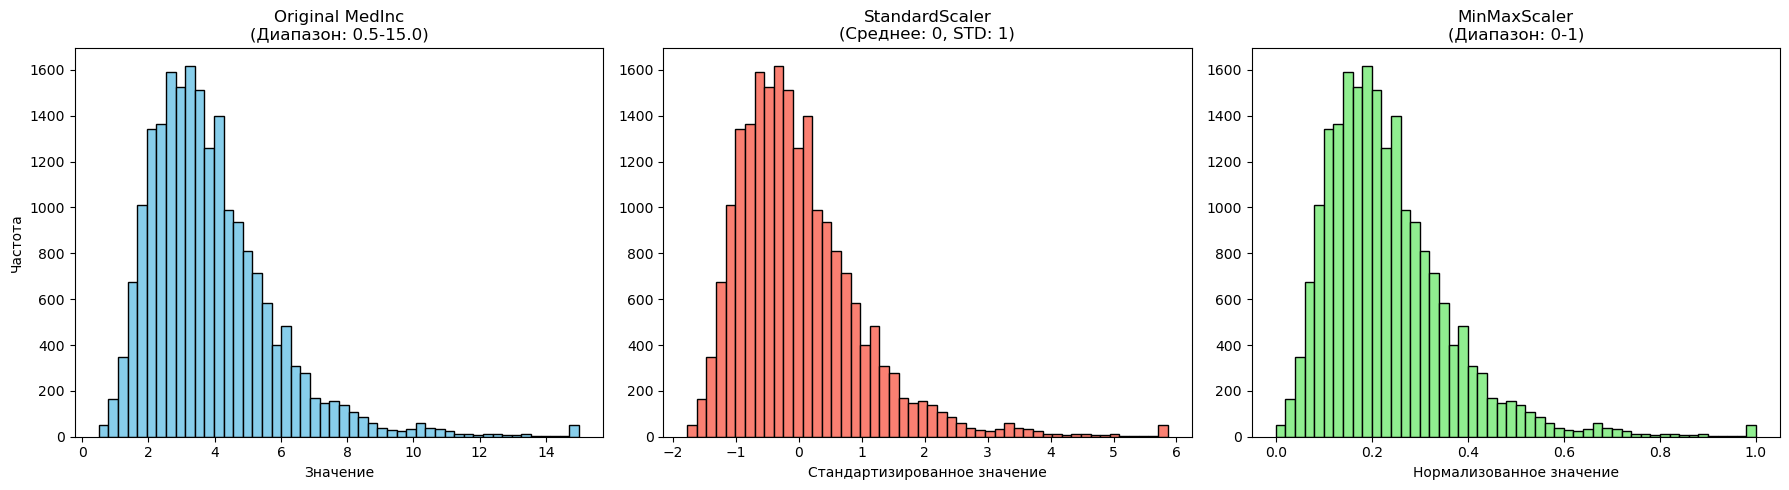


Сравнение статистик MedInc:
Метрика              | Оригинал   | StandardScaler | MinMaxScaler
-----------------------------------------------------------------
Среднее              | 3.87       | 0.00           | 0.23
Станд. отклонение    | 1.90       | 1.00           | 0.13
Минимум              | 0.50       | -1.77          | 0.00
Максимум             | 15.00      | 5.86           | 1.00


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler


california = fetch_california_housing(as_frame=True)


data = california.frame


scaler_standard = StandardScaler()
data_standard = pd.DataFrame(
    scaler_standard.fit_transform(data),
    columns=data.columns
)


data_minmax = data.copy()
scaler_minmax = MinMaxScaler()
data_minmax = pd.DataFrame(
    scaler_minmax.fit_transform(data_minmax),
    columns=data.columns
)


plt.figure(figsize=(18, 5))


plt.subplot(1, 3, 1)
plt.hist(data['MedInc'], bins=50, color='skyblue', edgecolor='black')
plt.title('Original MedInc\n(Диапазон: {:.1f}-{:.1f})'.format(
    data['MedInc'].min(), data['MedInc'].max()))
plt.xlabel('Значение')
plt.ylabel('Частота')


plt.subplot(1, 3, 2)
plt.hist(data_standard['MedInc'], bins=50, color='salmon', edgecolor='black')
plt.title('StandardScaler\n(Среднее: 0, STD: 1)')
plt.xlabel('Стандартизированное значение')


plt.subplot(1, 3, 3)
plt.hist(data_minmax['MedInc'], bins=50, color='lightgreen', edgecolor='black')
plt.title('MinMaxScaler\n(Диапазон: 0-1)')
plt.xlabel('Нормализованное значение')

plt.tight_layout()
plt.show()


print('\n' + '='*45)
print('Сравнение статистик MedInc:')
print('='*45)
print(f"{'Метрика':<20} | {'Оригинал':<10} | {'StandardScaler':<14} | {'MinMaxScaler'}")
print('-'*65)
print(f"{'Среднее':<20} | {data['MedInc'].mean():<10.2f} | {data_standard['MedInc'].mean():<14.2f} | {data_minmax['MedInc'].mean():.2f}")
print(f"{'Станд. отклонение':<20} | {data['MedInc'].std():<10.2f} | {data_standard['MedInc'].std():<14.2f} | {data_minmax['MedInc'].std():.2f}")
print(f"{'Минимум':<20} | {data['MedInc'].min():<10.2f} | {data_standard['MedInc'].min():<14.2f} | {data_minmax['MedInc'].min():.2f}")
print(f"{'Максимум':<20} | {data['MedInc'].max():<10.2f} | {data_standard['MedInc'].max():<14.2f} | {data_minmax['MedInc'].max():.2f}")

In [15]:
# Импорт библиотек
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd

# 1. Загрузка и подготовка данных
data = fetch_openml('adult', version=2, as_frame=True)
df = data.frame

# Проверка реальных названий столбцов
print("Доступные колонки:", df.columns.tolist())

# Выбор нужных признаков (используем фактические названия из датасета)
df = df[['education', 'marital-status', 'occupation', 'class']]  # 'class' вместо 'income'
df = df.rename(columns={'class': 'income'})  # Переименовываем обратно в 'income'

# Обработка пропусков в occupation
df['occupation'] = df['occupation'].replace('?', 'Unknown')

# 2. Label Encoding для education
education_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters',
    'Prof-school', 'Doctorate'
]
df['education'] = OrdinalEncoder(categories=[education_order]).fit_transform(df[['education']])

# 3. One-Hot Encoding с исключением дамми-ловушки
ohe_encoder = OneHotEncoder(drop='first', sparse_output=False)
ohe_data = ohe_encoder.fit_transform(df[['marital-status', 'occupation']])
ohe_columns = ohe_encoder.get_feature_names_out(['marital-status', 'occupation'])

# Сборка финального датафрейма
df_final = pd.concat([
    df[['education', 'income']],
    pd.DataFrame(ohe_data, columns=ohe_columns, index=df.index)
], axis=1)

# 4. Проверка размерности
print(f"\nРазмерность до кодирования: {df[['education', 'marital-status', 'occupation']].shape}")
print(f"Размерность после кодирования: {df_final.drop('income', axis=1).shape}")

# 5. Проверка на дамми-ловушку
print(f"\nПроверка уникальных значений:")
print(f"marital-status: {df['marital-status'].nunique()} → {len(ohe_encoder.categories_[0])-1} колонок")
print(f"occupation: {df['occupation'].nunique()} → {len(ohe_encoder.categories_[1])-1} колонок")

Доступные колонки: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']

Размерность до кодирования: (48842, 3)
Размерность после кодирования: (48842, 21)

Проверка уникальных значений:
marital-status: 7 → 6 колонок
occupation: 14 → 14 колонок


1. Обзор структуры данных
Первые 5 строк:
   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ----- 

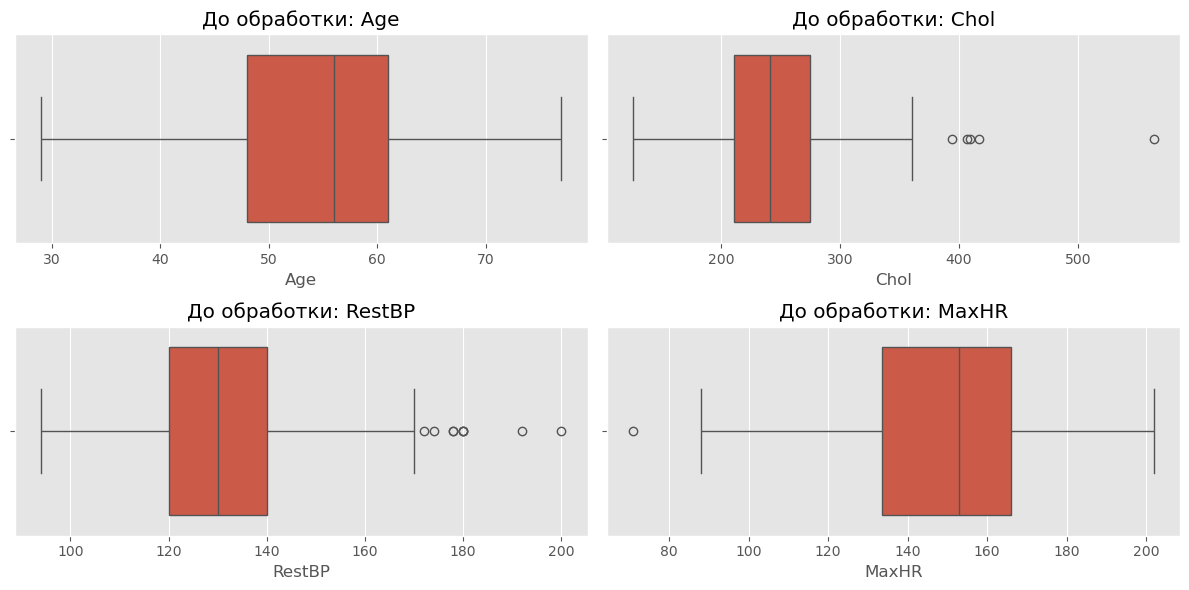

Удалено строк: 15


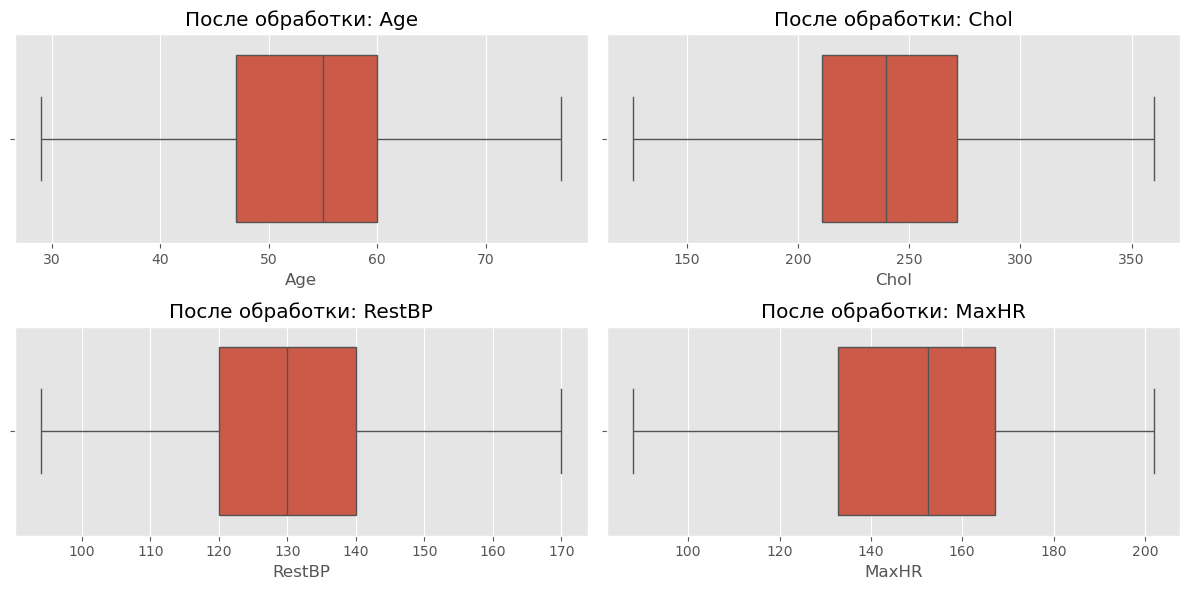


4. Масштабирование

Данные после масштабирования:
                Age          Chol        RestBP         MaxHR
count  2.880000e+02  2.880000e+02  2.880000e+02  2.880000e+02
mean   2.713879e-16 -1.480297e-16 -8.234154e-16  2.837237e-16
std    1.001741e+00  1.001741e+00  1.001741e+00  1.001741e+00
min   -2.772005e+00 -2.594835e+00 -2.333769e+00 -2.724901e+00
25%   -7.844430e-01 -7.092555e-01 -6.529704e-01 -7.490641e-01
50%    9.891803e-02 -6.960453e-02 -6.509502e-03  1.229532e-01
75%    6.510187e-01  6.423548e-01  6.399514e-01  7.742066e-01
max    2.528161e+00  2.611367e+00  2.579334e+00  2.308516e+00

5. Кодирование

Первые 5 строк после кодирования:
  cat__Sex_1 cat__ChestPain_nonanginal cat__ChestPain_nontypical  \
0        1.0                       0.0                       0.0   
1        1.0                       0.0                       0.0   
2        1.0                       0.0                       0.0   
3        1.0                       1.0                       0.0   


In [106]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Загрузка данных
df = pd.read_csv('Heart.csv')

# 1. Обзор структуры данных
print("="*50 + "\n1. Обзор структуры данных\n" + "="*50)
print("Первые 5 строк:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nОписательная статистика:")
print(df.describe(include='all'))

# 2. Обработка пропущенных значений
print("\n" + "="*50 + "\n2. Обработка пропущенных значений\n" + "="*50)
print("Пропуски до обработки:")
print(df.isna().sum())

# Заполнение пропусков в 'Ca' и 'Thal' модой
df['Ca'] = df['Ca'].fillna(df['Ca'].mode()[0])
df['Thal'] = df['Thal'].fillna(df['Thal'].mode()[0])

print("\nПропуски после обработки:")
print(df.isna().sum())

# 3. Обработка выбросов (исправленная версия)
print("\n" + "="*50 + "\n3. Обработка выбросов\n" + "="*50)

# Исправленный список числовых колонок — Chol вместо Cholesterol
numeric_cols = ['Age', 'Chol', 'RestBP', 'MaxHR']

# Визуализация выбросов до обработки
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'До обработки: {col}')
plt.tight_layout()
plt.show()

# Удаление выбросов по IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

original_size = df.shape[0]
for col in numeric_cols:
    df = remove_outliers(df, col)
new_size = df.shape[0]

print(f"Удалено строк: {original_size - new_size}")

# Визуализация после обработки
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'После обработки: {col}')
plt.tight_layout()
plt.show()

# 4. Масштабирование числовых признаков
print("\n" + "="*50 + "\n4. Масштабирование\n" + "="*50)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])
print("\nДанные после масштабирования:")
print(df_scaled[numeric_cols].describe())

# 5. Кодирование категориальных признаков
print("\n" + "="*50 + "\n5. Кодирование\n" + "="*50)
categorical_cols = ['Sex', 'ChestPain', 'ExAng', 'RestECG']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ], 
    remainder='passthrough'
)

df_encoded = preprocessor.fit_transform(df_scaled)
feature_names = preprocessor.get_feature_names_out()
df_encoded = pd.DataFrame(df_encoded, columns=feature_names)

print("\nПервые 5 строк после кодирования:")
print(df_encoded.head())

# 6. Итоговый датасет
print("\n" + "="*50 + "\nИтоговый датасет\n" + "="*50)
print(f"Размерность данных: {df_encoded.shape}")
df_encoded.to_csv('heart_preprocessed.csv', index=False)